SetUp

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from cycler import cycler
from IPython.display import display
import datetime

from sklearn.decomposition import PCA

In [2]:
class KaggleLoadSubmit:
    def __init__(self, competition_name, csv_dir):
        """Kaggleのデータのダウンロードおよび提出を行うクラス

        Args:
            competition_name (string): Kaggleのコンペ名
            csv_dir (string): ダウンロード先と、提出先のcsvのディレクトリをstringで指定
        """
        self.kaggle_api = KaggleApi()
        self.csv_dir = csv_dir
        self.competition_name = competition_name
        if self.csv_dir[-1] != '\\':
            self.csv_dir += '\\'
        self.kaggle_api.authenticate()

    def download_zip(self):
        """コンペティションのzipファイルをダウンロードする
        """
        ret = self.kaggle_api.competition_download_files(self.competition_name, self.csv_dir, force=True)
        print(ret)

    def submit_csv(self, csv_name, message):
        """csvデータを提出する

        Args:
            csv_name (string): csvの名前
            message (string): 提出メッセージ
        """
        csv_path = self.csv_dir + csv_name
        self.kaggle_api.competition_submit(csv_path, message, self.competition_name)

    def read_csv(self, csv_name):
        csv_path = self.csv_dir + csv_name
        return pd.read_csv(csv_path)

In [3]:
work_dir = 'C:\\Users\\Takanori\\Desktop\\Kaggle\\TPS2204\\data'
kls = KaggleLoadSubmit('tabular-playground-series-apr-2022', work_dir)

In [4]:
# kls.download_zip()

# Data  
  
In this competition, you'll classify 60-second sequences of sensor data, indicating whether a subject was in either of two activity states for the duration of the sequence.  
  
Files and Field Descriptions  
train.csv - the training set, comprising ~26,000 60-second recordings of thirteen biological sensors for almost one thousand experimental participants  
sequence - a unique id for each sequence  
subject - a unique id for the subject in the experiment  
step - time step of the recording, in one second intervals  
sensor_00 - sensor_12 - the value for each of the thirteen sensors at that time step  
train_labels.csv - the class label for each sequence.  
sequence - the unique id for each sequence.  
state - the state associated to each sequence. This is the target which you are trying to predict.  
test.csv - the test set. For each of the ~12,000 sequences, you should predict a value for that sequence's state.  
sample_submission.csv - a sample submission file in the correct format.  
  
このコンテストでは、60秒間の一連のセンサーデータを分類し、被験者が一連の活動期間中に2つの活動状態のいずれかにあったかどうかを示します。  
ファイルとフィールドの説明。  
train.csv - 約1,000人の実験参加者を対象に、13個の生体センサーの60秒間の記録を約26,000個収録したトレーニングセット。  
sequence -各シーケンスの一意のid。  
subject - experiment 内のサブジェクトの一意のid。  
step - 記録の時間ステップ、1 秒間隔。  
sensor_00 - sensor_12 - その時間ステップにおける13 個の各センサーの値。  
train_labels.csv -各シーケンスのクラスラベル。  
sequence -各シーケンスの一意のid。  
state -各シーケンスに関連付けられた状態。これは、あなたが予測しようとしているターゲットです。  
test.csv -テストセット。約12,000個のシーケンスのそれぞれについて、そのシーケンスの状態の値を予測する必要があります。  
sample_submission.csv -正しい形式のサンプル提出ファイル。  


https://www.kaggle.com/competitions/tabular-playground-series-apr-2022  
https://www.kaggle.com/code/ambrosm/tpsapr22-eda-which-makes-sense

In [5]:
plt.rcParams['axes.facecolor'] = '#0057b8' # blue
plt.rcParams['axes.prop_cycle'] = cycler(color=['#ffd700'] +
                                         plt.rcParams['axes.prop_cycle'].by_key()['color'][1:])

In [6]:
train = kls.read_csv('train.csv')
train_labels = kls.read_csv('train_labels.csv')
test = kls.read_csv('test.csv')

print()
print('Train')
display(train.head())

print()
print('Train_labels')
display(train_labels.head())

print()
print('Test')
display(test.head())

print('Dataframe shapes:', train.shape, train_labels.shape, test.shape)
print()
print(f'Sequence numbering in train_labels: from {train_labels.sequence.min()} to {train_labels.sequence.max()}')
print(f'Sequence numbering in train: from {train.sequence.min()} to {train.sequence.max()}')
print(f'Sequence numbering in test: from {test.sequence.min()} to {test.sequence.max()}')
print()
print(f'Step numbering: from {train.step.min()} to {train.step.max()}')
print()
print(f'Subject numbering in train: from {train.subject.min()} to {train.subject.max()}')
print(f'Subject numbering in test: from {test.subject.min()} to {test.subject.max()}')
print()
print(f'States: {np.unique(train_labels.state)}')


Train


,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359



Train_labels


,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1



Test


,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,25968,684,0,2.427357,19.639706,1.0,-1.466372,-1.289973,-4.207928,2.486339,-2.493893,8.0,-1.123555,-1.673048,10.980453,0.419011
1,25968,684,1,-4.950541,-21.747899,1.0,0.983186,-0.569053,1.845924,-3.887978,1.727481,-2.9,0.395231,-0.882233,-1.871399,-0.008525
2,25968,684,2,1.136012,-10.756303,1.0,1.016814,0.964157,2.454749,0.312386,1.154198,-5.6,1.114162,1.525273,-11.584362,0.139812
3,25968,684,3,0.806028,6.504202,1.0,-0.179646,0.969221,-1.035153,-0.457195,0.254962,-2.7,-0.588873,0.608761,-4.241770,-0.462916
4,25968,684,4,1.288253,5.552521,1.0,-0.493805,-1.036124,-1.126402,2.008197,-0.730534,0.0,0.899566,-1.259615,-0.472222,-0.121483


Dataframe shapes: (1558080, 16) (25968, 2) (733080, 16)

Sequence numbering in train_labels: from 0 to 25967
Sequence numbering in train: from 0 to 25967
Sequence numbering in test: from 25968 to 38185

Step numbering: from 0 to 59

Subject numbering in train: from 0 to 671
Subject numbering in test: from 672 to 990

States: [0 1]


There are almost 26000 sequences in the training data (25968, to be precise). The train dataframe has exactly 60 times more rows than the train_labels dataframe (25968 * 60 = 1558080) because every sequence has 60 steps. There are no missing steps, and the steps are numbered from 0 to 59.  
  
We have to predict a binary state for every series (binary classification). Every sequence has 60 * 13 = 780 features.  
  
The train and test subjects are disjoint.  
  
Insight:  
  
As the train and test subjects are different, we cannot use the subject as a feature. On the contrary: we have to make sure that our classifier generalizes to previously unseen subjects. This suggests a GroupKFold cross-validation with the subjects as groups.  
With the 780 features per sequence, feature engineering could play an important role here. Or we might use a deep neural network which operates on the raw data and learns the features itself.  
In the following notebook cell, we check how often each subject occurs in the training data. The most infrequent subject occurs only twice; the most frequent subject is a hundred times more frequent; it occurs 199 times.  
  
Insight:  
  
If we cross-validate with a simple GroupKFold, the training and validation sets for the different folds will have different sizes. Maybe we can neglect this, maybe we want to take additional measures to have training sets of similar sizes.  
  
学習データには約26000個の配列があります（正確には25968個）。各シーケンスには60のステップがあるため，trainデータフレームはtrain_labelsデータフレームのちょうど60倍（25968 * 60 = 1558080）の行数を持っています．また，各ステップには0から59までの番号が振られており，欠番はありません．  
  
我々は、すべての系列について、バイナリ状態を予測する必要があります（バイナリ分類）。各シーケンスには60 * 13 = 780個の特徴がある。  
  
訓練被験者とテスト被験者は離散的である。  
  
洞察する。  
  
訓練被験者とテスト被験者が異なるので、被験者を特徴量として利用することはできない。逆に、分類器が以前に見たことのない被験者にも汎化することを確認する必要があります。そのため、被験者をグループとして、GroupKFoldクロスバリデーションを行うことを提案する。  
1シーケンスあたり780個の特徴量を持つため、特徴量エンジニアリングが重要な役割を果たす可能性があります。あるいは、生データで動作し、特徴そのものを学習するディープニューラルネットワークを使うかもしれない。  
以下のノートブックセルでは、各被験者が学習データ中にどれくらいの頻度で出現しているかを確認しています。最も頻度の低い主題は2回しか出現しないが、最も頻度の高い主題はその100倍、199回出現する。  
  
洞察力  
  
単純なGroupKFoldで交差検証を行った場合、異なるフォールドのトレーニングセットと検証セットは異なるサイズになります。これは無視できるかもしれませんし、同じようなサイズのトレーニングセットを用意するために追加で対策を講じたいかもしれません。

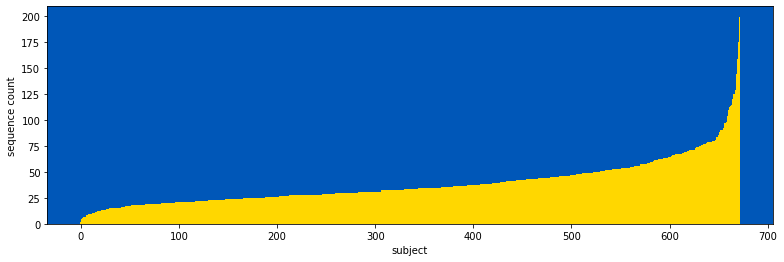

472      2
73       5
265      6
519      7
486      7
      ... 
87     129
647    144
635    158
1      175
437    199
Name: subject, Length: 672, dtype: int64

In [7]:
plt.figure(figsize=(13, 4))
temp = train.subject.value_counts().sort_values() // 60
plt.bar(range(len(temp)), temp, width=1)
plt.xlabel('subject')
plt.ylabel('sequence count')
plt.show()
temp.sort_values()

While we are looking at the subjects, we can calculate the means of the states per subject and plot them as a histogram (the mean of the state corresponds to the probability that state == 1).

The histogram shows that the subjects are inherently different. Every subject has its own probability of state==1, and this probability can have any value between 0 and 1. 59 subjects are always in state 0.


被験者を見ている間に、被験者ごとの状態の平均を計算し、ヒストグラムとしてプロットすることができます(状態の平均は、状態==1である確率に対応しています)。  
ヒストグラムは、被験者が本質的に異なることを示す。すべての被験者は、状態=1の独自の確率を持っており、この確率は、0と1の間の任意の値を持つことができます。59人の被験者は常に状態0である。  



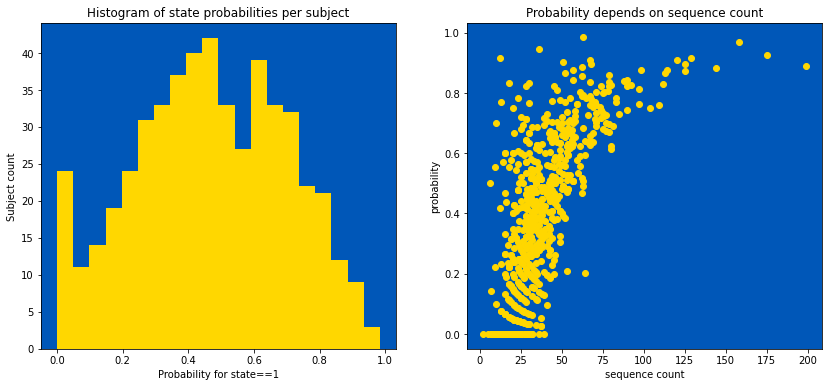


The standard deviation of 0.23 is much higher than 0.1.

Subjects which are always in state 0: 59


In [8]:
temp = train.groupby('sequence').subject.min() # dataframe with one row per sequence
temp = train_labels.merge(temp, on='sequence') # add a column with the labels
temp = temp.groupby('subject').agg({'state': 'mean', 'sequence': 'count'}).rename(columns={'state': 'probability', 'sequence': 'sequence_count'})
temp1 = temp[temp.sequence_count >= 25].probability.rename('Probability of state==1')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(temp1, bins=20)
plt.ylabel('Subject count')
plt.xlabel('Probability for state==1')
plt.title('Histogram of state probabilities per subject')

plt.subplot(1, 2, 2)
plt.scatter(temp.sequence_count, temp.probability)
plt.xlabel('sequence count')
plt.ylabel('probability')
plt.title('Probability depends on sequence count')
plt.show()

print()
print(f"The standard deviation of {temp[temp.sequence_count >= 25].probability.std():.2f} is much higher than 0.1.")
print()
print('Subjects which are always in state 0:', (temp.probability == 0).sum())

In [9]:
temp = train.groupby('sequence').subject.min() # dataframe with one row per sequence
temp = train_labels.merge(temp, on='sequence') # add a column with the labels
temp1 = temp.groupby('subject').agg({'state': 'mean', 'sequence': 'count'})
temp1

,state,sequence
subject,,
0,0.250000,20
1,0.925714,175
2,0.394737,38
3,0.333333,36
4,0.346154,26
...,...,...
667,0.790323,62
668,0.142857,21
669,0.160000,25


Insight:

These views on the data confirms the earlier insight that generalization to previously unseen subjects is important and that the cross-validation strategy has to take this into account.
The more often a subject occurs in the training data, the higher its probability for state=1. Although we must not use the subject as a feature, we should count how many sequences belong to every subject and use this count as a feature. (I tried it and this feature improved the predictions.)


The lower left of the scattergram shows some dots which are grouped to hyperbolas. This is an artefact of low sequence counts and cannot be exploited for prediction. (If a subject has only one or two positive sequences, the probability is 1 / sequence count or 2 / sequence count, respectively, and these are the hyperbolas.

インサイト:  
データに関するこれらの見解は、以前には見られなかった主題への一般化が重要であり、クロスバリデーション戦略はこれを考慮に入れなければならないという以前の洞察を裏付けるものである。  
被験者がトレーニングデータに頻繁に現れるほど、状態=1の確率は高くなる。サブジェクトをフィーチャーとして使用してはならないが、各サブジェクトに属するシーケンスの数をカウントし、このカウントをフィーチャーとして使用すべきである。(私はそれを試してみて、この機能は予測を改善しました)。  
散布図の左下には、双曲線にグループ化されたいくつかの点が示されています。これは、低い配列カウントのアーチファクトであり、予測のために利用され得ない。(対象が1つまたは2つの陽性配列のみを有する場合、確率はそれぞれ1/配列カウントまたは2/配列カウントであり、これらは双曲線である。

The sensors  
We can plot histograms for all 13 sensors. The histograms show that every sensor has outliers.  
  
Insight:  
  
We will have to deal with outliers. If there are only a few sequences with outliers, we can drop the whole sequences. If most sequences contain outliers, we will need to replace the outliers by more reasonable values rather than dropping them. In other words: It is important to understand whether the outliers are single steps or whole sequences.  
  
センサ。  
13個すべてのセンサーのヒストグラムをプロットすることができます。ヒストグラムは、すべてのセンサーに異常値があることを示しています。  
インサイト:  
外れ者を相手にしなければならなくなる。外れ値を持つシーケンスが数個しかない場合は、シーケンス全体を削除できます。ほとんどのシーケンスに外れ値が含まれている場合は、外れ値をドロップするのではなく、より合理的な値で置き換える必要があります。言い換えれば、外れ値が単一のステップなのか、それともシーケンス全体なのかを理解することが重要です。

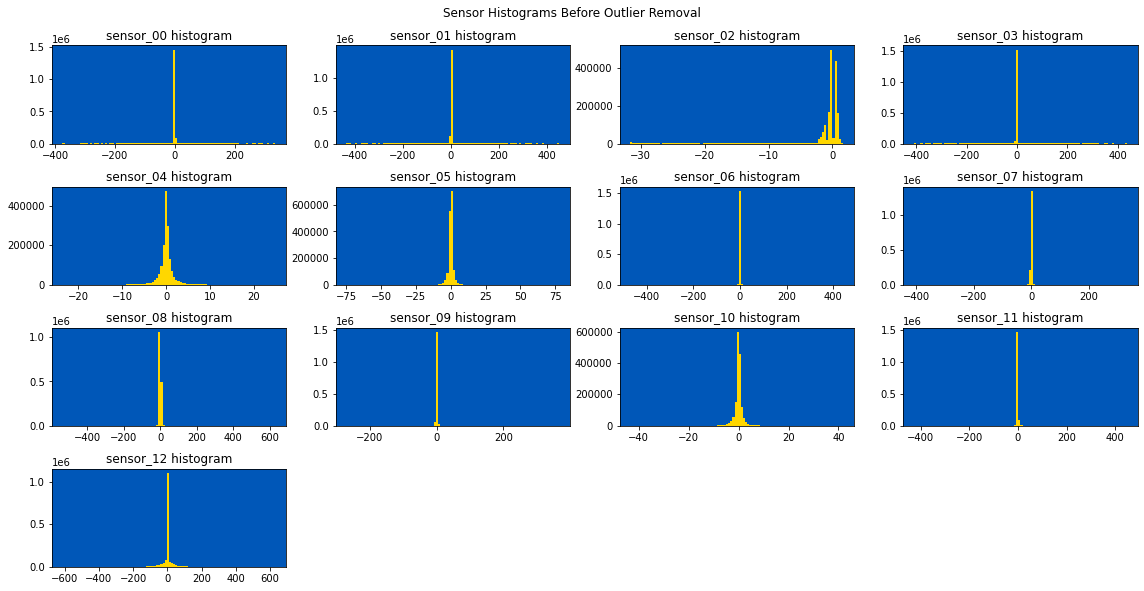

In [10]:
figure = plt.figure(figsize=(16, 8))
for sensor in range(13):
    sensor_name = f"sensor_{sensor:02d}"
    plt.subplot(4, 4, sensor+1)
    plt.hist(train[sensor_name], bins=100)
    plt.title(f"{sensor_name} histogram")
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Sensor Histograms Before Outlier Removal', y=1.02)
plt.show()

Now let's plot the "inner" part of the histogram after removing 2 % outliers on either side. We see that the sensors differ in their characteristics:

Most measurements of sensor_02 return multiples of 0.33 (but the values in between occur with a low probability).
Sensor_08 has discrete values (multiples of 0.1).
Some sensors look like normal distributions, others (in particular sensor_12) have a long tail.
The distributions look symmetric with the center at 0.

では、両側の2%の外れ値を取り除いた後、ヒストグラムの「内側」の部分をプロットしてみましょう。センサーの特性が異なることがわかります。  
sensor_02 のほとんどの測定値は0.33 の倍数を返します(ただし、その間の値は低い確率で発生します)。  
Sensor_08 には離散値 (0.1 の倍数) があります。  
正規分布のように見えるセンサーもあれば、長いテールを持つセンサー(特にsensor_12)もある。  
分布は、中心が0で対称的に見えます。  


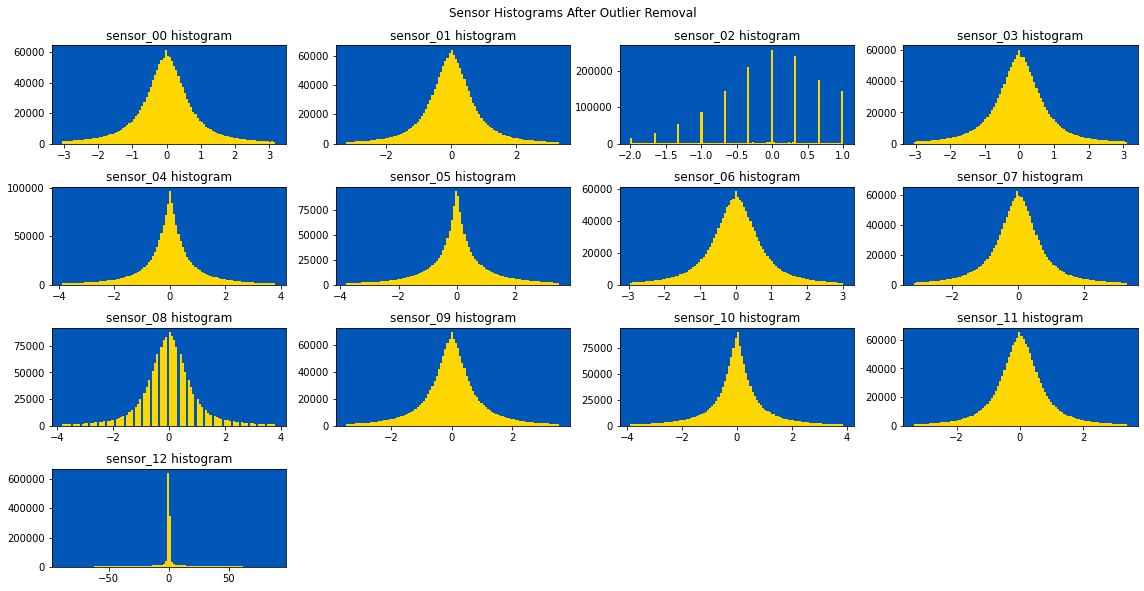

In [11]:
figure = plt.figure(figsize=(16, 8))
for sensor in range(13):
    sensor_name = f"sensor_{sensor:02d}"
    plt.subplot(4, 4, sensor+1)
    # rangeで、横軸の最小値と最大値を設定できる
    plt.hist(train[sensor_name], bins=100,
             range=(train[sensor_name].quantile(0.02),
                    train[sensor_name].quantile(0.98)))
    plt.title(f"{sensor_name} histogram")
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Sensor Histograms After Outlier Removal', y=1.02)
plt.show()

Sensor_12 has a long tail even if we declare 30 % of the data to be outliers:

Sensor_12 は、データの30 % を外れ値と宣言しても、長い末尾を持ちます。


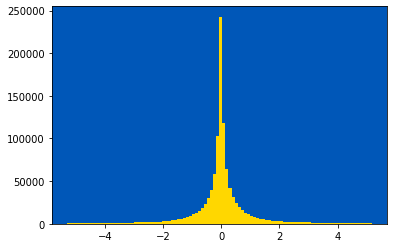

In [12]:
sensor_name = 'sensor_12'
plt.hist(train[sensor_name], bins=100,
         range=(train[sensor_name].quantile(0.15),
                train[sensor_name].quantile(0.85)))
plt.show()

Insight:

As we probably cannot declare 30 % of the data to be outliers, we may want to apply some non-linear transformation (e.g., QuantileTransformer) to the sensor values to get a more normal distribution.


To conclude the analysis of the sensors, let's count the unique values. Although the train dataframe has more than 1.5 million rows, every sensor returns much fewer unique values. It seems that the sensors return discrete values, or they often return a constant value for long time intervals.

インサイト:

データの30%を外れ値と宣言することはできないため、より正規分布を得るために、センサー値に非線形変換(QuantileTransformerなど)を適用する必要があるかもしれません。


センサーの分析を終了するには、一意の値をカウントしてみましょう。train dataframe には150 万行以上ありますが、各センサーが返す一意の値ははるかに少なくなります。センサーは離散的な値を返すか、長い時間間隔で一定の値を返すことが多いようです。

In [13]:
print("Count of unique values per sensor:")
for sensor in range(13):
    sensor_name = f"sensor_{sensor:02d}"
    print(f"{sensor_name}: {len(np.unique(train[sensor_name])):6d}")

Count of unique values per sensor:
sensor_00:  25792
sensor_01:  28326
sensor_02:   4771
sensor_03:  26976
sensor_04: 387971
sensor_05:  22839
sensor_06:  25078
sensor_07:  28147
sensor_08:   1924
sensor_09:  30127
sensor_10: 268478
sensor_11:  28932
sensor_12: 303949


Time series

We now plot the a few sequences as time series (sequences are from left to right, sensors from top to bottom):

時系列。

ここでは、いくつかのシーケンスを時系列としてプロットします(シーケンスは左から右へ、センサーは上から下へ)。


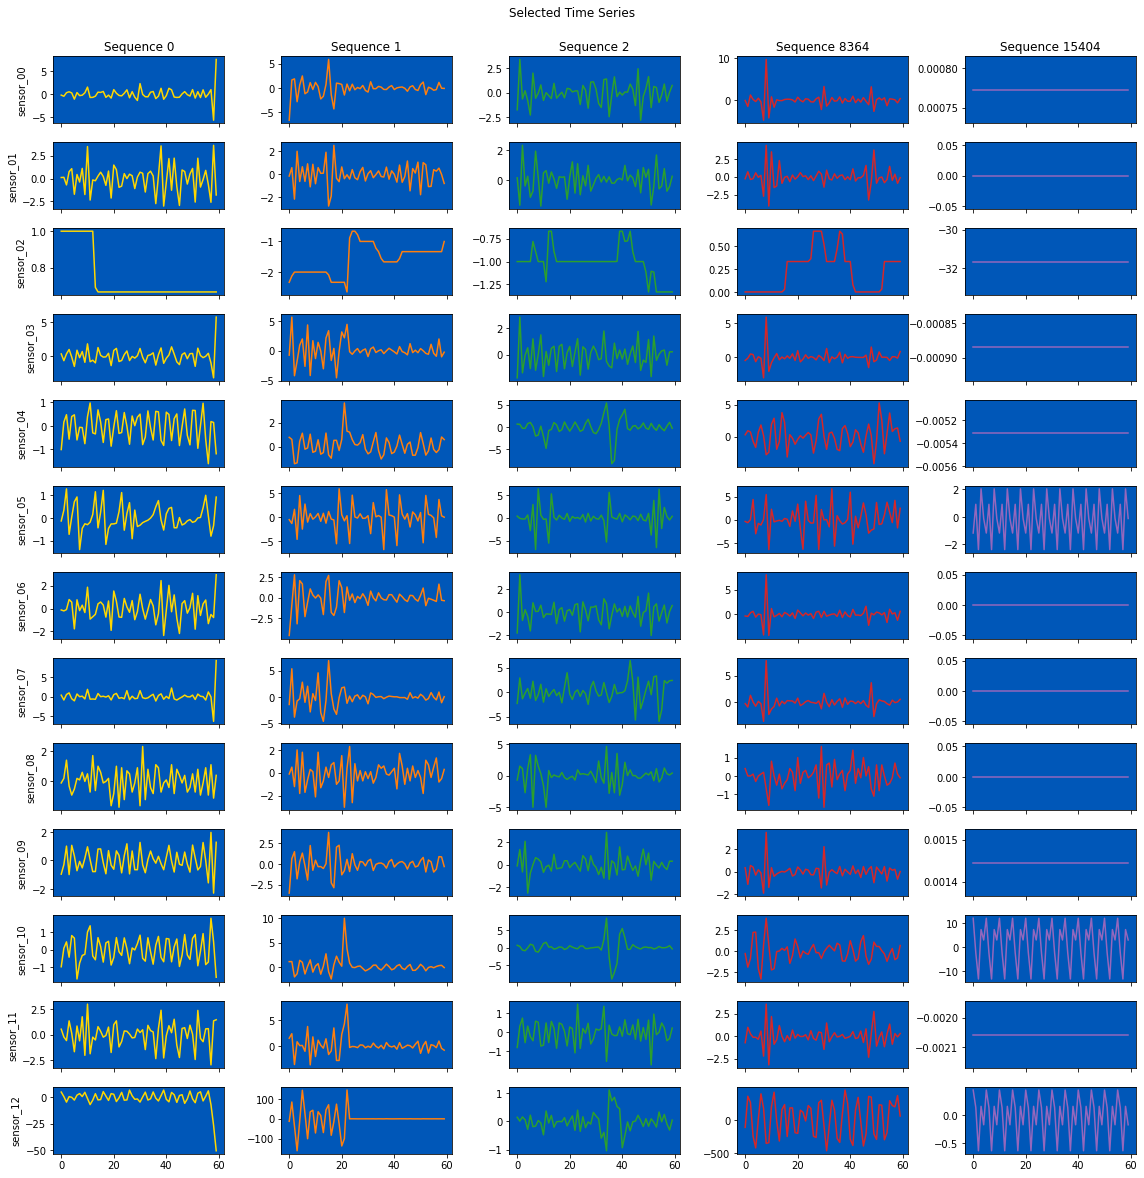

In [14]:
sequences = [0, 1, 2, 8364, 15404]
figure, axes = plt.subplots(13, len(sequences), sharex=True, figsize=(16, 16))
for i, sequence in enumerate(sequences):
    for sensor in range(13):
        sensor_name = f"sensor_{sensor:02d}"
        plt.subplot(13, len(sequences), sensor * len(sequences) + i + 1)
        plt.plot(range(60), train[train.sequence == sequence][sensor_name],
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i % 10])
        if sensor == 0: plt.title(f"Sequence {sequence}")
        if sequence == sequences[0]: plt.ylabel(sensor_name)
figure.tight_layout(w_pad=0.1)
plt.suptitle('Selected Time Series', y=1.02)
plt.show()

In the diagrams above, we see:  
  
Most time series have a waveform with a high frequency. "High frequency" means that the value changes between positive and negative almost at every sampling step.  
Amplitude matters: For sequence 1 (orange), most waveforms have a higher amplitude during the first half of the time series than during the second half. For some sensors of sequence 0 (yellow), amplitude increases just two or three steps before the end of the time series.  
Sensor_02 (the one with the discrete levels) changes level only from time to time.  
At least one sequence (number 15404) doesn't follow the general pattern; some of its sensors have a constant value.  
The waveform of sensor_12 (bottommost diagram) has widely varying amplitudes: From less than 1 (sequence 2) up to 500 (sequence 8364).  
Insight:  
  
Feature engineering should detect the changes in amplitude somehow.  
Measuring the base frequency of the time series probably won't be very useful.  
Feature engineering for sensor_02 will differ from the other sensors.  
We should check for sensors which return a constant value; maybe this can be used as a feature.

上の図では、次のように表示されます。  
大部分の時系列は、高周波数の波形を有する。「高周波数」とは、ほぼすべてのサンプリングステップで値が正と負の間で変化することを意味します。  
振幅は重要です。シーケンス1(オレンジ)の場合、ほとんどの波形の振幅は、時系列の前半の方が後半よりも大きくなります。シーケンス0 (黄色) のいくつかのセンサでは、振幅は時系列の終わりの2 つまたは3 つのステップだけ前に増加します。  
Sensor_02 (離散レベルを持つもの) は、時々のみレベルを変更します。  
少なくとも1つのシーケンス(番号15404)は、一般的なパターンに従わず、そのセンサーのいくつかは一定の値を持っています。  
sensor_12の波形(一番下の図)は、振幅が大きく変化します。1未満(シーケンス2)から500(シーケンス8364)まで。  

特徴工学は振幅の変化をどうにかして検出すべきである。  
時系列の基本周波数を測定することは、おそらくあまり役に立たないでしょう。  
sensor_02 の機能エンジニアリングは、他のセンサとは異なります。  
定数値を返すセンサーをチェックする必要があります。これは機能として使用できます。  


Stuck at a constant

For every sensor we'll count the sequences which have the sensor stuck at a constant value, and we determine the average label:

一定に留まる。

すべてのセンサーについて、センサーが一定の値でスタックしているシーケンスをカウントし、平均ラベルを決定します。

In [16]:
# For every sensor: count the sequences where the sensor is stuck at a constant value
def stuck_at_constant(seq):
    return seq.min() == seq.max()

for sensor in range(13):
    sensor_name = f"sensor_{sensor:02d}"
    stuck_sequences = train.groupby('sequence')[sensor_name].apply(stuck_at_constant)
    print(f"{sensor_name}: {stuck_sequences.sum():4d}   {train_labels[stuck_sequences].state.mean()}")

sensor_00:   44   0.0
sensor_01:   44   0.0
sensor_02: 1280   0.04609375
sensor_03:   44   0.0
sensor_04:   25   0.0
sensor_05:    0   nan
sensor_06:   44   0.0
sensor_07:   44   0.0
sensor_08:   44   0.0
sensor_09:   44   0.0
sensor_10:    0   nan
sensor_11:   44   0.0
sensor_12:   19   0.0


Insight:

If a sensor is stuck at a constant value for the whole sequence, in most cases we may predict a state of 0. This method gives the correct prediction for more than 1000 training sequences.

インサイト:

センサがシーケンス全体に対して一定値で止まっている場合、ほとんどの場合、0の状態を予測できます。この方法は、1000以上のトレーニングシーケンスに対して正しい予測を与える。


Pivot form of the data

We can pivot the dataframe so that every sequence corresponds to one row. In this pivoted dataframe, every row contains 13 sensor values for 60 time steps, i.e. 780 features. This pivot form of the dataframe can be useful for some data transformations:

データのピボット形式。

すべてのシーケンスが1 つの行に対応するように、データフレームをピボットできます。このピボット化されたデータフレームでは、すべての行に60 の時間ステップの13 のセンサー値、つまり780 の機能が含まれています。このデータフレームのピボット形式は、いくつかのデータ変換に役立ちます。


In [17]:
train_pivoted = train.pivot(index=['sequence', 'subject'], columns='step', values=[col for col in train.columns if 'sensor_' in col])
train_pivoted

sensor_00                                                    \
step                    0         1         2         3         4         5    
sequence subject                                                               
0        47      -0.196291 -0.447450  0.326893  0.523184  0.272025 -1.073416   
1        66      -6.657651  1.633694  1.863215 -2.846213  0.593509  2.469861   
2        66      -1.741886  3.402628 -0.632148  0.208655 -0.800618 -2.274343   
3        542      0.264297 -1.808346  0.078825  1.037094 -0.189335 -1.302937   
4        437      0.567233 -0.823802  1.476816 -1.710201 -0.408810  0.556414   
...                    ...       ...       ...       ...       ...       ...   
25963    558     -1.441267  2.359351 -0.881762  1.299073 -0.862442 -1.428130   
25964    297      0.996909  0.415765  1.874034 -5.220247  2.927357 -0.311437   
25965    129     -0.097372 -0.860896  0.928903  0.750386  1.346986 -3.422720   
25966    170     -0.357032 -1.603555 -0.296754  0.273570  0.462133  0.244977   
25967    327     -0.313756  0.392581 -0.554096  0.070325 -0.258114  0.095054   

                                                          ...  sensor_12  \
step                    6         7         8         9   ...         50   
sequence subject                                          ...              
0        47       0.350850 -0.304482 -0.216383  0.303709  ...  -1.670077   
1        66      -1.202473 -0.829212  1.091190 -0.334621  ...  -0.338022   
2        66       2.009274 -0.563369 -0.050232  0.800618  ...  -0.172634   
3        542      1.078825  2.257342 -2.283617 -2.759660  ...   0.145354   
4        437      0.853168 -0.406491 -0.009274 -0.021638  ...   0.001705   
...                    ...       ...       ...       ...  ...        ...   
25963    558      0.125193  2.119784  0.208655  1.847759  ...   0.049020   
25964    297      0.496909  0.372488 -0.341577 -0.565688  ...  36.889173   
25965    129      0.983771  2.818393 -1.460587 -1.988408  ...   2.394714   
25966    170     -0.341577 -0.229521  0.877125 -1.197063  ...  14.010656   
25967    327      0.387172 -0.824575  0.471406 -0.037094  ...   0.909207   

                                                                         \
step                     51         52         53         54         55   
sequence subject                                                          
0        47       -5.306479   3.621057   4.965047  -3.615090   0.791134   
1        66        0.234868   0.030691   0.037511  -0.120205   0.056692   
2        66        0.091645  -0.028986  -0.202472   0.332481  -0.013214   
3        542      -0.045610  -0.098039  -0.049446   0.055840  -0.022165   
4        437      -0.050725  -0.025149   0.106138  -0.098465  -0.040068   
...                     ...        ...        ...        ...        ...   
25963    558      -0.089940   0.059250  -0.013640  -0.083973   0.026002   
25964    297      21.105286  -4.421142  16.871697  -4.326939 -13.625320   
25965    129      -0.677323   1.435209  -0.645780  -0.449275   0.271952   
25966    170      48.826939  25.958227  -7.077153 -12.375533   9.170077   
25967    327      -0.830776  -1.007246   1.064365   0.639812  -0.914749   

                                                             
step                    56         57         58         59  
sequence subject                                             
0        47       5.887042  -7.211424 -26.738704 -50.658994  
1        66       0.062234  -0.013640   0.098039  -0.115090  
2        66       0.245524  -0.091219  -0.306905   0.046036  
3        542      0.054135  -0.185422   0.311168  -0.166240  
4        437      0.135976   0.121910  -0.059676  -0.087809  
...                    ...        ...        ...        ...  
25963    558      0.036232  -0.042199   0.028986  -0.015772  
25964    297      9.957374 -13.389173 -17.123615   9.219523  
25965    129     -0.262575   0.713129  -1.378517   1.802217  
25966    170      6.789855 -15.28729

Duplicated sequences

Using the pivoted dataframe, we can easily show that some subjects have duplicated sequences (i.e. if two sequences are equal, they belong to the same subject).

Insight:

We can drop the duplicates, but with 22 duplicates out of 25967 sequences, this won't matter much.

By the way, all these duplicates have sensor_00 stuck at 0.000773 and a label of 0.

重複配列。

ピボット化されたデータフレームを使用すると、いくつかの被写体が重複したシーケンスを持っていることを簡単に示すことができます(すなわち、2つのシーケンスが等しい場合、それらは同じ被写体に属しています)。

インサイト:

重複を削除できますが、25967個のシーケンスのうち22個の重複があるので、これはあまり重要ではありません。

ちなみに、これらの重複はすべてsensor_00が0.000773で止まっていて、ラベルが0になっています。

In [18]:
temp = train_pivoted.sort_values(by=list(train_pivoted.columns))
duplicates_first = temp.duplicated(keep='first')
duplicates_last = temp.duplicated(keep='last')
temp['duplicates_first'] = duplicates_first
temp['duplicates_last'] = duplicates_last
duplicates = temp[duplicates_first | duplicates_last]
display(duplicates)

print()
print('All these sequences have sensor_00 stuck at 0.000773:', duplicates['sensor_00'].apply(stuck_at_constant).all())

print()
print(f'Labels of the duplicates: {list(train_labels.loc[duplicates.index.get_level_values(0)].state)}')

sensor_00                                                    \
step                     0         1         2         3         4         5   
sequence subject                                                               
5882     573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
16294    573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
346      573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
1772     573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
14349    234      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
21524    234      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
3335     359      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
9324     359      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
16829    359      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
25576    359      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
1957     401      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
4512     401      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
6428     234      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
12958    234      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
1586     48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
10633    48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
1428     48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
25450    48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
2817     48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
11926    48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
36       573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
11560    573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   

                                                          ... sensor_12  \
step                     6         7         8         9  ...        52   
sequence subject                                          ...             
5882     573      0.000773  0.000773  0.000773  0.000773  ...  0.547315   
16294    573      0.000773  0.000773  0.000773  0.000773  ...  0.547315   
346      573      0.000773  0.000773  0.000773  0.000773  ...  0.561381   
1772     573      0.000773  0.000773  0.000773  0.000773  ...  0.561381   
14349    234      0.000773  0.000773  0.000773  0.000773  ...  0.031969   
21524    234      0.000773  0.000773  0.000773  0.000773  ...  0.031969   
3335     359      0.000773  0.000773  0.000773  0.000773  ...  0.046462   
9324     359      0.000773  0.000773  0.000773  0.000773  ...  0.046462   
16829    359      0.000773  0.000773  0.000773  0.000773  ...  0.046462   
25576    359      0.000773  0.000773  0.000773  0.000773  ...  0.046462   
1957     401      0.000773  0.000773  0.000773  0.000773  ... -0.616795   
4512     401      0.000773  0.000773  0.000773  0.000773  ... -0.616795   
6428     234      0.000773  0.000773  0.000773  0.000773  ...  1.187553   
12958    234      0.000773  0.000773  0.000773  0.000773  ...  1.187553   
1586     48       0.000773  0.000773  0.000773  0.000773  ...  0.029838   
10633    48       0.000773  0.000773  0.000773  0.000773  ...  0.029838   
1428     48       0.000773  0.000773  0.000773  0.000773  ... -0.084825   
25450    48       0.000773  0.000773  0.000773  0.000773  ... -0.084825   
2817     48       0.000773  0.000773  0.000773  0.000773  ... -0.159847   
11926    48       0.000773  0.000773  0.000773  0.000773  ... -0.159847   
36       573      0.000773  0.000773  0.000773  0.000773  ... -0.928389   
11560    573      0.000773  0.000773  0.000773  0.000773  ... -0.928389   

                                                                              \
step                    53        54        55        56    


All these sequences have sensor_00 stuck at 0.000773: True

Labels of the duplicates: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


PCA

In an EDA, I usually analyze the principal components of the data. With the many outliers here, however, the PCA is deceptive: The principal components are dominated by the outliers, and after outlier removal, the PCA looks completely different.

The effect is shown in the diagrams below: Before outlier removal (left), it seems like the first 50 principal components explain almost all the variance. After outlier removal (right), the first 50 principal components explain almost nothing.

Insight:

Be cautious with PCAs whenever outliers are present!
The correlation matrix has the same issue: If you see any correlations, you have to check whether only the outliers are correlated or all the data.

PCA

EDAでは通常、データの主成分を分析します。しかし、ここには多くの外れ値があるので、PCAは欺瞞的である:主成分は外れ値によって支配されており、外れ値を除去した後、PCAは完全に異なって見える。

外れ値除去前(左)では、最初の50個の主成分がほとんどすべての分散を説明しているように見えます。外れ値を取り除いた後(右)、最初の50の主成分はほとんど何も説明していません。

インサイト:

外れ値が存在する場合は、PCA に注意してください。

相関行列にも同じ問題があります。相関がある場合、外れ値だけが相関しているか、すべてのデータが相関しているかを確認する必要があります。


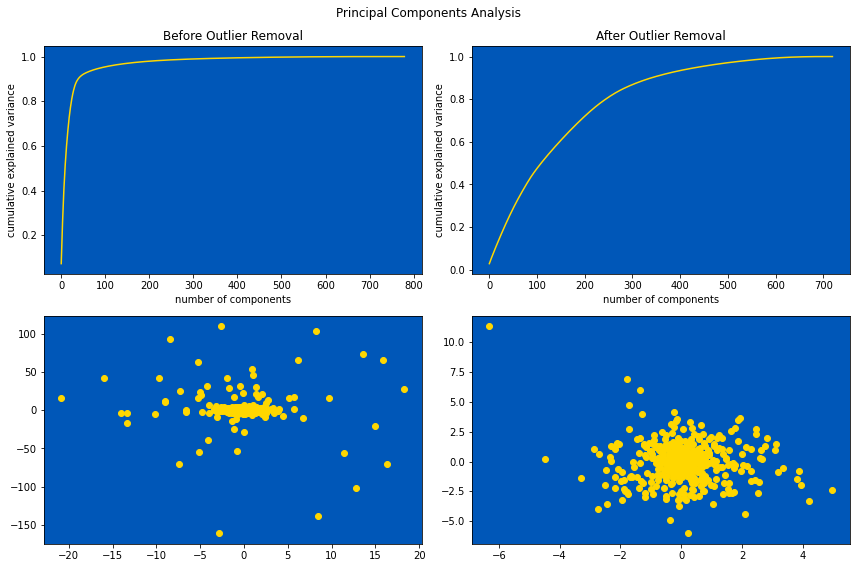

In [19]:
# Compute the PCA
# Outlier removal or input scaling may change the PCA completely
# whiten=True/False doesn't change the look of the diagrams (it only modifies the scale)
def plot_pca(df, col, title):
    """Plot cumulative variance and the first two components in column col of the figure."""
    pca = PCA()
    #pca.fit(StandardScaler().fit_transform(train_df.drop(columns=['id', 'target'])))
    Xt = pca.fit_transform(df.values)

    # Plot the cumulative explained variance
    plt.subplot(2, 2, col+1)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.title(title)

    # Scatterplot of the first two dimensions
    plt.subplot(2, 2, col+3)
    plt.scatter(Xt[0], Xt[1])
    
temp = train_pivoted.clip(train_pivoted.quantile(0.02, axis=0).values,
                          train_pivoted.quantile(0.98, axis=0).values, 
                          axis=1)
temp.pop('sensor_12')

plt.figure(figsize=(12, 8))
plot_pca(train_pivoted, 0, 'Before Outlier Removal')
plot_pca(temp, 1, 'After Outlier Removal')
plt.suptitle('Principal Components Analysis')
plt.tight_layout(h_pad=1.1)
plt.show()